In [1]:
!pip install praw pandas numpy matplotlib seaborn nltk textblob spacy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52537 entries, 0 to 52536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            52537 non-null  object 
 1   title         52537 non-null  object 
 2   text          52537 non-null  object 
 3   created_utc   52537 non-null  float64
 4   score         52537 non-null  int64  
 5   num_comments  52537 non-null  int64  
 6   subreddit     52537 non-null  object 
 7   category      52537 non-null  object 
 8   disorder      52537 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ MB
None
        id                                              title  \
0  1joyhmu  People who were diagnosed late in life, what's...   
1  1jp2iex               Accidentally managed my ADHD at work   
2  1jpf7td  Does your ADHD cause you to skip and stutter y...   
3  1jp5gle       What is a hobby that actually stuck for you?   
4  1jpc5di  I think I figur

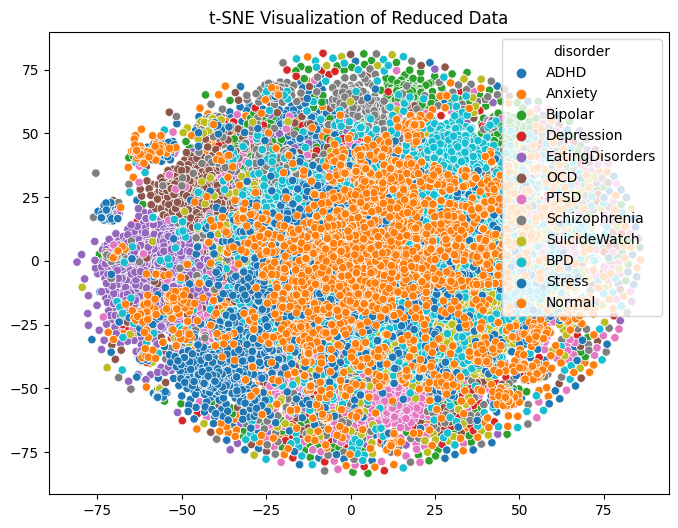

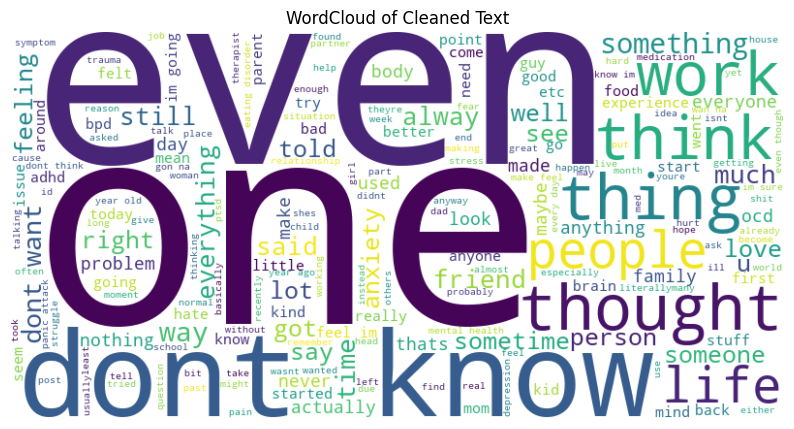

Advanced Preprocessing and Visualization Complete. Cleaned dataset saved.


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, chi2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import STOPWORDS

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

file_path = r'C:\Users\User\Downloads\SMA2\reddit_mental_health_dataset_cleaned_normal.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

df.drop_duplicates(inplace=True)
df.dropna(subset=['text'], inplace=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english') and t not in STOPWORDS]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

label_encoder = LabelEncoder()
df['disorder_encoded'] = label_encoder.fit_transform(df['disorder'])

vectorizer = TfidfVectorizer(max_features=15000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['disorder_encoded']

svd = TruncatedSVD(n_components=300)
X_reduced = svd.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_reduced)
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['disorder'], palette='tab10')
plt.title('t-SNE Visualization of Reduced Data')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Cleaned Text')
plt.show()

df.to_csv('reddit_mental_health_dataset_processed.csv', index=False)
print("Advanced Preprocessing and Visualization Complete. Cleaned dataset saved.")




C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anacon

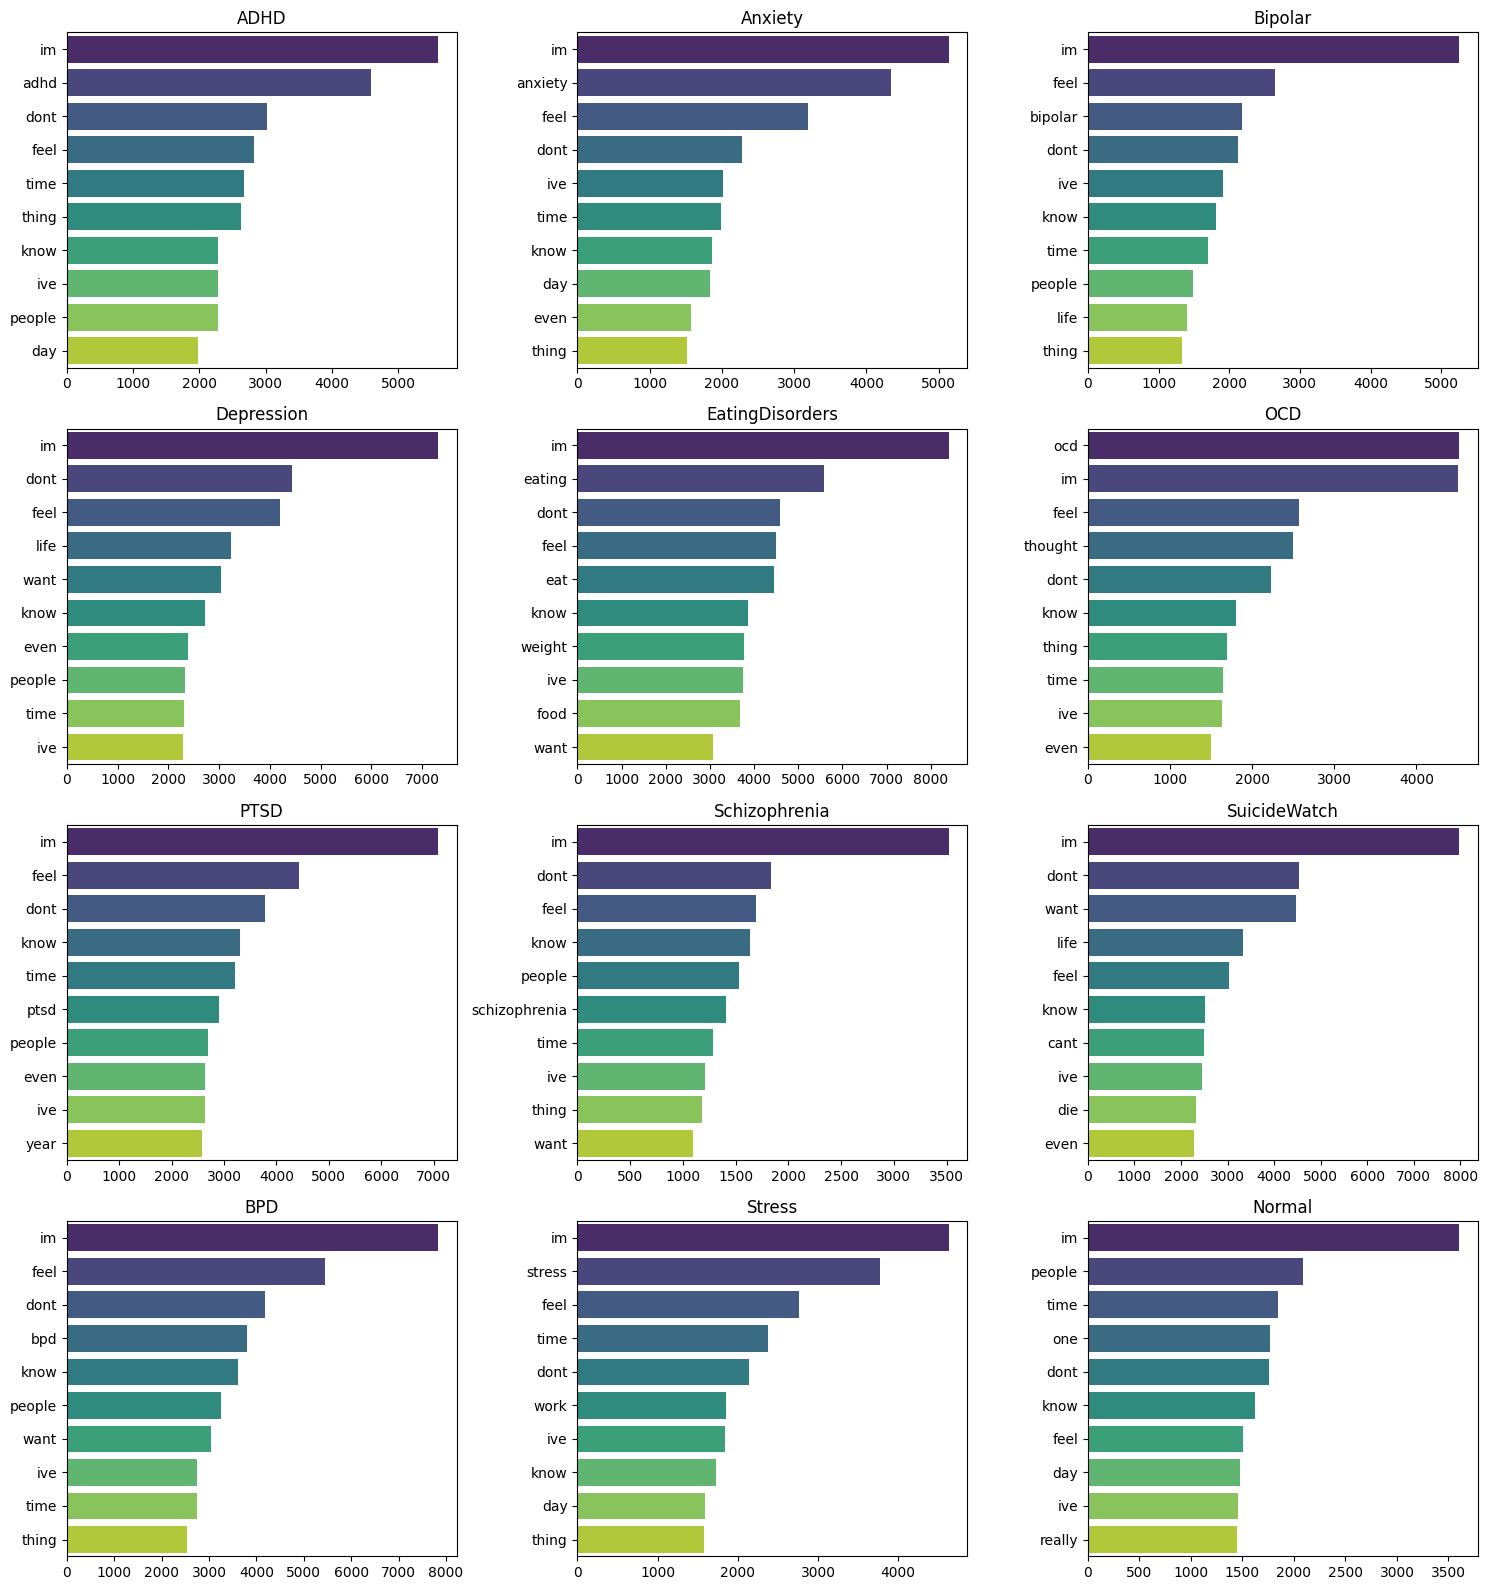

In [4]:
def plot_common_words_per_disorder(df):
    disorders = df['disorder'].unique()
    num_disorders = len(disorders)
    cols = 3
    rows = (num_disorders // cols) + (num_disorders % cols > 0)
    plt.figure(figsize=(cols * 5, rows * 4))
    for i, disorder in enumerate(disorders):
        plt.subplot(rows, cols, i + 1)
        text_data = ' '.join(df[df['disorder'] == disorder]['clean_text'])
        word_freq = Counter(text_data.split()).most_common(10)
        words, freqs = zip(*word_freq)
        sns.barplot(x=list(freqs), y=list(words), palette="viridis")
        plt.title(disorder)
    plt.tight_layout()
    plt.show()

plot_common_words_per_disorder(df)


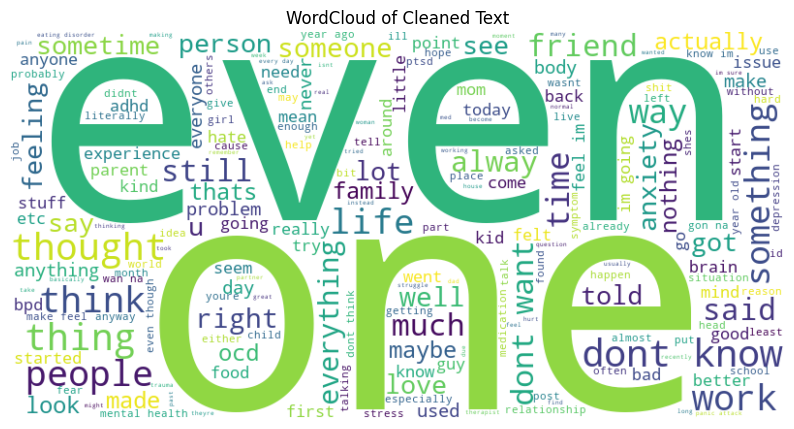

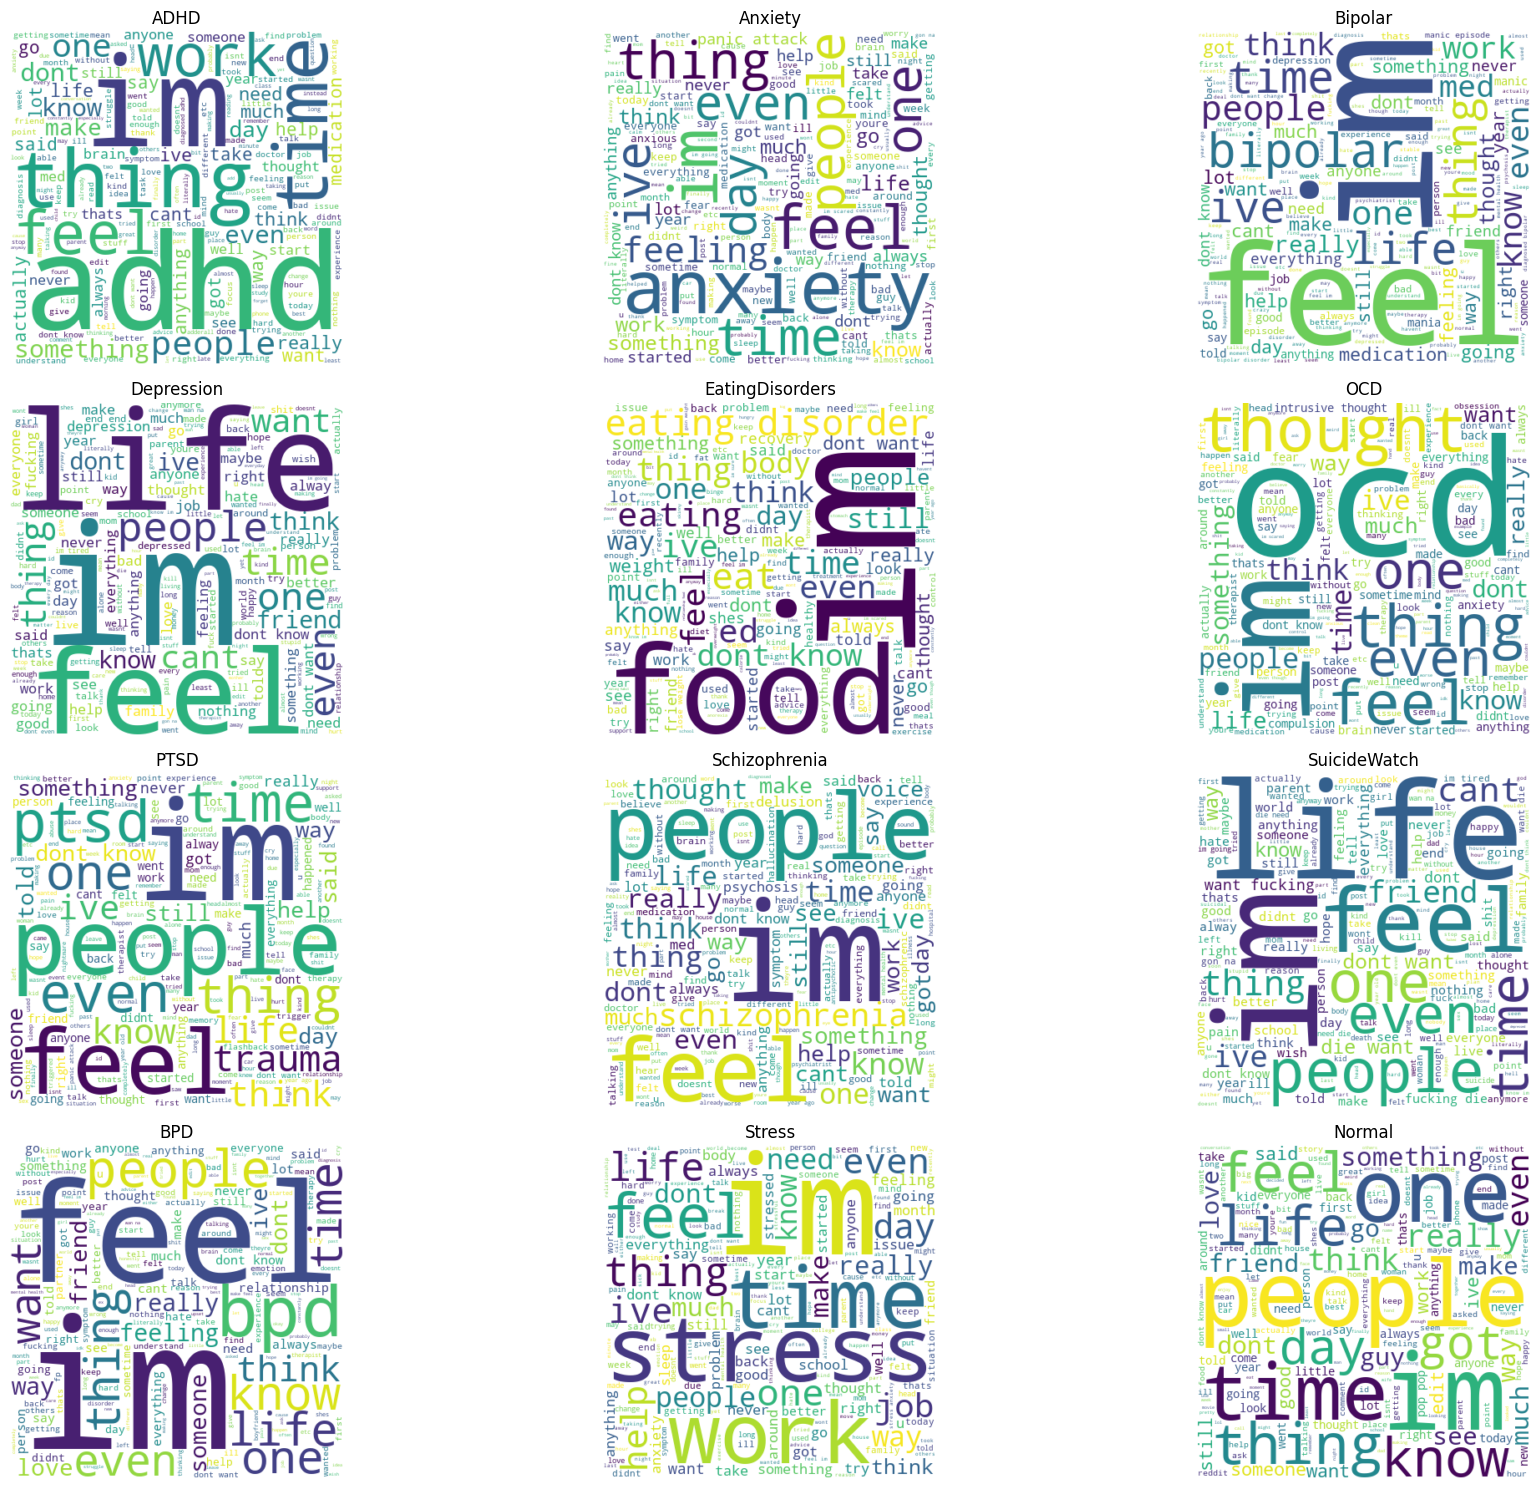

In [ ]:


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Cleaned Text')
plt.show()


def plot_wordcloud_per_disorder(df):
    disorders = df['disorder'].unique()
    plt.figure(figsize=(20, 15))
    cols = 3
    rows = (len(disorders) // cols) + (len(disorders) % cols > 0)
    for i, disorder in enumerate(disorders):
        plt.subplot(rows, cols, i + 1)
        text_data = ' '.join(df[df['disorder'] == disorder]['clean_text'])
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text_data)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(disorder)
    plt.tight_layout()
    plt.show()

plot_wordcloud_per_disorder(df)


In [9]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:

file_path = r'C:\Users\User\Downloads\SMA2\reddit_mental_health_dataset_processed.csv'
df = pd.read_csv(file_path)


def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    # Check for NaN or non-string values
    if not isinstance(text, str):
        return pd.Series([0, 0, 0, 0])  # Return neutral scores if text is invalid
    sentiment_scores = sid.polarity_scores(text)
    return pd.Series([sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'], sentiment_scores['compound']])


df[['negative', 'neutral', 'positive', 'compound']] = df['clean_text'].apply(analyze_sentiment)

df.to_csv('reddit_mental_health_dataset_processed_senti.csv', index=False)